# Refitting Literature Relations: $M_{\rm{gas}}$-$T_{\rm{X}}$

This section of the project fits scaling relations to literature datasets, in order to compare previous work to our results.

Here we focus on scaling relations between the hot gas mass of galaxy clusters and groups ($M_{\rm{gas}}$, or $M^{\rm{gas}}_{\Delta}$ within an overdensity radius $R_{\Delta}$) and the cluster/group global X-ray temperature ($T_{\rm{X}}$, or $T_{\rm{X},\Delta}$ within $R_{\Delta}$). If present in a property name, 'ce' means 'core-excised', normally 0.15$R_{500}$.

Relation fits are performed using the XGA interface to the R scaling-relation fitting package LIRA, see the paper for full details. This notebook uses data from the following:
* [Lovisari et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020ApJ...892..102L/abstract) - a set of 120 galaxy clusters selected from the Planck-ESZ catalog, followed up with XMM observations, and then analysed. No $M_{gas}$-$T_{\rm{X}}$ relation was published from this data previously.

## Import Statements

In [1]:
import pandas as pd
import numpy as np
from astropy.units import Quantity
from astropy.cosmology import LambdaCDM

# This adds the directory above to the path, allowing me to import the common functions that I've written in
#  common.py - this just saves me repeating boring code and makes sure its all consistent
import sys
sys.path.insert(0, '..')
from common import lovisari_cosmo, tx_norm, mgas_norm

import xga
from xga.relations.fit import scaling_relation_lira

## Normalisation values

These are used when fitting the scaling relations to normalise the data, and are kept the same throughout this entire project:

In [2]:
tx_norm

<Quantity 4. keV>

In [3]:
mgas_norm

<Quantity 1.e+13 solMass>

## Loading data files

All datasets to be refit are included in this repository, so we can load in the required data here.

### Lovisari et al. (2020)

In [4]:
lovisari_samp = pd.read_csv("../../sample_files/lovisari2020.csv")
lovisari_samp.head(6)

,PLCKESZ,z,M500,M500+,M500-,Mg500,Mg500+,Mg500-,kT,kT+,...,Lbol-,Lbolexc,Lbolexc+,Lbolexc-,NT,fT,Nsb,fsb,Simbad,NED
0,G000.44-41.83,0.165,5.01,0.55,0.48,6.61,0.36,0.33,5.85,0.32,...,0.78,6.36,0.47,0.47,6,1.00,20,1.21,Simbad,NED
1,G002.74-56.18,0.141,4.96,0.43,0.28,5.63,0.21,0.14,5.36,0.12,...,0.49,6.03,0.23,0.23,10,0.94,49,1.08,Simbad,NED
2,G003.90-59.41,0.151,6.94,0.19,0.19,8.65,0.08,0.08,7.06,0.13,...,0.67,11.62,0.43,0.43,10,0.98,63,1.08,Simbad,NED
3,G006.70-35.54,0.089,2.42,0.04,0.03,4.27,0.05,0.08,4.72,0.08,...,0.25,3.98,0.21,0.21,15,1.14,45,1.18,Simbad,NED
4,G006.78+30.46,0.203,17.56,0.28,0.27,32.00,0.24,0.22,14.37,0.12,...,1.74,60.27,0.84,0.84,19,1.26,171,1.62,Simbad,NED
5,G008.44-56.35,0.149,3.61,0.08,0.07,4.64,0.05,0.04,5.12,0.08,...,0.34,4.54,0.22,0.22,8,1.10,41,1.24,Simbad,NED


In [5]:
lovisari_samp.columns

Index(['PLCKESZ', 'z', 'M500', 'M500+', 'M500-', 'Mg500', 'Mg500+', 'Mg500-',
       'kT', 'kT+', 'kT-', 'kTexc', 'kTexc+', 'kTexc-', 'LX', 'LX+', 'LX-',
       'LXexc', 'LXexc+', 'LXexc-', 'Lbol', 'Lbol+', 'Lbol-', 'Lbolexc',
       'Lbolexc+', 'Lbolexc-', 'NT', 'fT', 'Nsb', 'fsb', 'Simbad', 'NED'],
      dtype='object')

Calculating E(z) values for these clusters:

In [6]:
lovisari_samp['E'] = lovisari_cosmo.efunc(lovisari_samp['z'].values)

## Fitting scaling relations

### Lovisari et al. (2020)

#### $M^{\rm{gas}}_{500}$-$T_{\rm{X,500}}$

In [7]:
# Setting up property variables in astropy quantity objects
lov_mgas500 = Quantity(lovisari_samp[['Mg500', 'Mg500-','Mg500+']]*1e+13, 'Msun')*lovisari_samp['E'].values[..., None]
lov_tx500 = Quantity(lovisari_samp[['kT', 'kT-','kT+']], 'keV')

lov_mgas500_tx500 = scaling_relation_lira(lov_mgas500[:, 0], lov_mgas500[:, 1:], lov_tx500[:, 0], lov_tx500[:, 1:], 
                                          mgas_norm, tx_norm, y_name=r"$E(z)M^{\rm{gas}}_{500}$", x_name=r"$T_{\rm{X,500}}$", 
                                          dim_hubb_ind=1, point_names=lovisari_samp['PLCKESZ'].values)
lov_mgas500_tx500.model_colour = 'sienna'
lov_mgas500_tx500.save("../../outputs/scaling_relations/literature_refits/mgas-tx/lovisari2020_mgas500_tx500.xgarel")

R[write to console]: module mix loaded



  |**************************************************| 100%


In [8]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=lov_mgas500_tx500.pars[0][0], e=lov_mgas500_tx500.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}".format(v=lov_mgas500_tx500.pars[1][0], e=lov_mgas500_tx500.pars[1][1]))

Slope of 1.971 ± 0.089

Normalisation of 3.534 ± 0.168


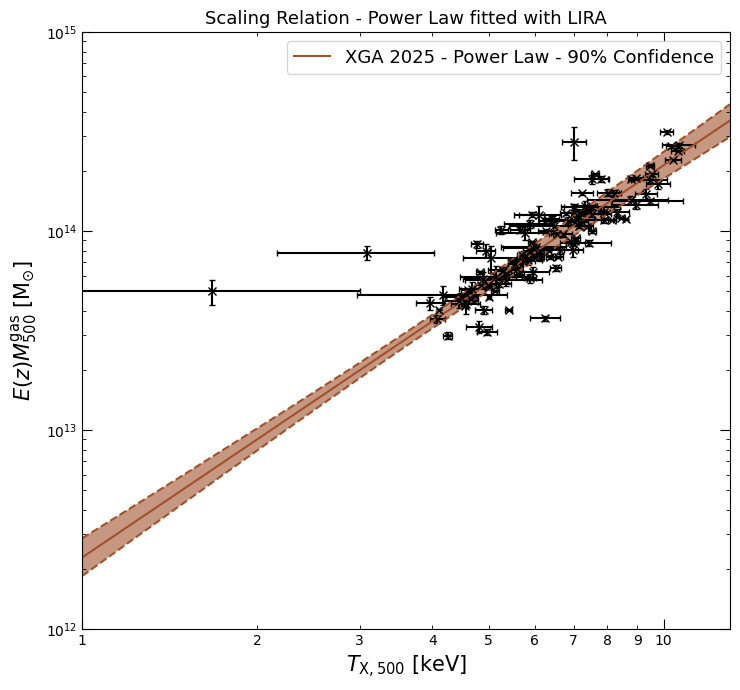

In [9]:
lov_mgas500_tx500.view(figsize=(7.5, 7), x_lims=Quantity([1, 13], 'keV'), y_lims=Quantity([1e+12, 1e+15], 'Msun'))

#### $M^{\rm{gas}}_{500}$-$T_{\rm{X,500ce}}$

In [10]:
# Setting up property variables in astropy quantity objects
lov_mgas500 = Quantity(lovisari_samp[['Mg500', 'Mg500-','Mg500+']]*1e+13, 'Msun')*lovisari_samp['E'].values[..., None]
lov_tx500ce = Quantity(lovisari_samp[['kTexc', 'kTexc-','kTexc+']], 'keV')

lov_mgas500_tx500ce = scaling_relation_lira(lov_mgas500[:, 0], lov_mgas500[:, 1:], lov_tx500ce[:, 0], lov_tx500ce[:, 1:], 
                                            mgas_norm, tx_norm, y_name=r"$E(z)M^{\rm{gas}}_{500}$", x_name=r"$T_{\rm{X,500ce}}$", 
                                            dim_hubb_ind=1, point_names=lovisari_samp['PLCKESZ'].values)
lov_mgas500_tx500ce.model_colour = 'sandybrown'
lov_mgas500_tx500ce.save("../../outputs/scaling_relations/literature_refits/mgas-tx/lovisari2020_mgas500_tx500ce.xgarel")

  |**************************************************| 100%


In [11]:
print("Slope of {v:.3f} ± {e:.3f}\n".format(v=lov_mgas500_tx500ce.pars[0][0], e=lov_mgas500_tx500ce.pars[0][1]))
print("Normalisation of {v:.3f} ± {e:.3f}".format(v=lov_mgas500_tx500ce.pars[1][0], e=lov_mgas500_tx500ce.pars[1][1]))

Slope of 2.008 ± 0.081

Normalisation of 3.497 ± 0.152


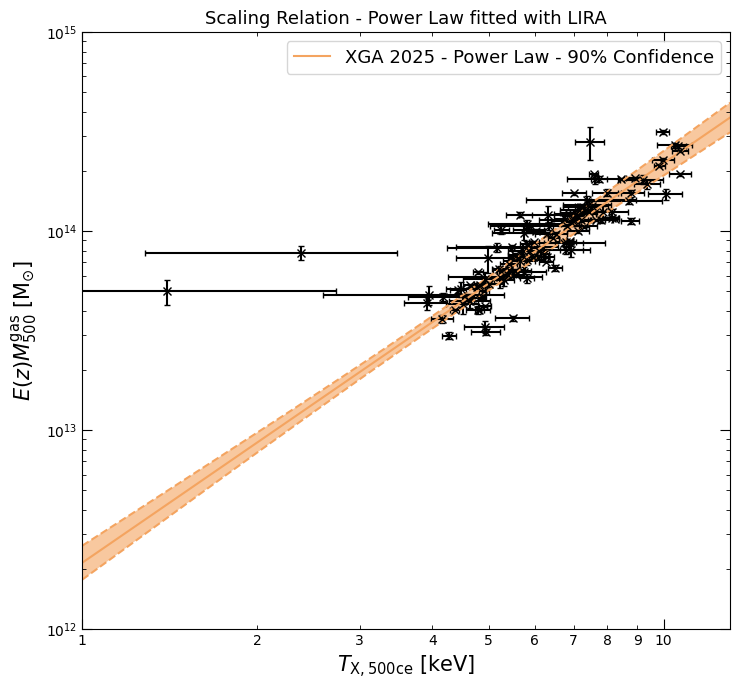

In [12]:
lov_mgas500_tx500ce.view(figsize=(7.5, 7), x_lims=Quantity([1, 13], 'keV'), 
                         y_lims=Quantity([1e+12, 1e+15], 'Msun'))

#### Combined contours

/Users/dt237/software/anaconda3/envs/xga_env/lib/python3.12/site-packages/xga/products/relation.py:1243: UserWarning: Not all of these ScalingRelations have the same x-axis names.
  warn('Not all of these ScalingRelations have the same x-axis names.')


Removed no burn in
Removed no burn in


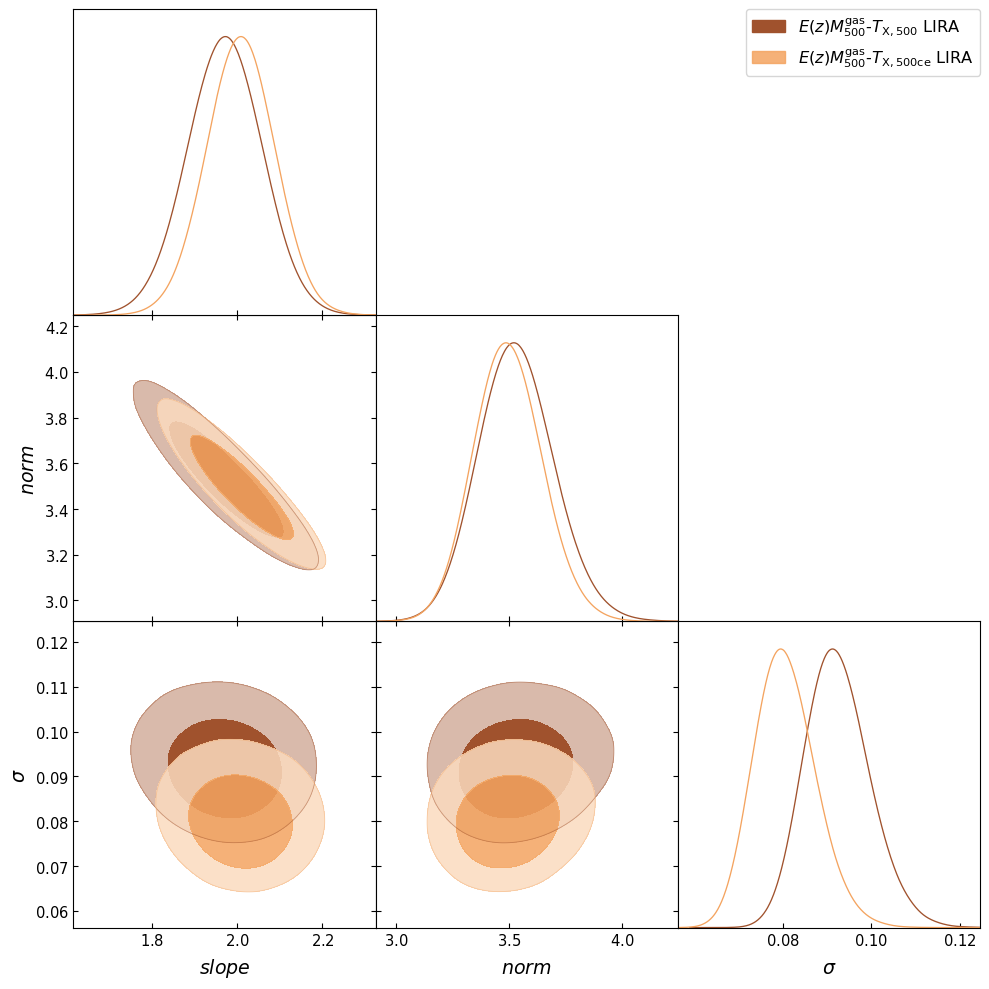

In [13]:
(lov_mgas500_tx500 + lov_mgas500_tx500ce).view_corner()